In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sn
import plotly.express as px

df=pd.read_csv("G:\gb\Advance Analytics\Theory\Day_1\MS_Dhoni_ODI_record.csv")
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [2]:
df.describe()


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
count,350,350,350,350,350,350,350,350,350,350
unique,133,91,97,232,16,9,17,80,350,350
top,DNB,-,-,-,0,0,v Sri Lanka,Dhaka,23/12/2004,ODI # 2199
freq,48,53,53,53,61,179,67,19,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        350 non-null    object
 1   runs_scored  350 non-null    object
 2   balls_faced  350 non-null    object
 3   strike_rate  350 non-null    object
 4   fours        350 non-null    object
 5   sixes        350 non-null    object
 6   opposition   350 non-null    object
 7   ground       350 non-null    object
 8   date         350 non-null    object
 9   odi_number   350 non-null    object
dtypes: object(10)
memory usage: 27.5+ KB


In [4]:
df.isna().sum()

score          0
runs_scored    0
balls_faced    0
strike_rate    0
fours          0
sixes          0
opposition     0
ground         0
date           0
odi_number     0
dtype: int64

In [5]:
# df_new = df.loc[((df['score'] != 'DNB') & (df['score']!='TNDB')),'runs_scored':]
# df_new

In [6]:
#same as above command
df1 = df[(df['score']!='DNB') & (df['score']!='TNDB') & (df['fours']!="-") & (df['sixes']!="-")]

In [7]:
ground_count = df1.value_counts("ground")
ground_count

ground
Dhaka            16
Colombo (RPS)    15
Dambulla         15
Mohali            9
Port of Spain     8
                 ..
Bristol           1
Lahore            1
Basseterre        1
Mumbai (BS)       1
Multan            1
Name: count, Length: 74, dtype: int64

In [8]:
df1['opposition'] = df1['opposition'].apply(lambda x:x[2:]) # removing "v " from v aus etc.
opposition_count = df1.value_counts("opposition")
opposition_count
# top_5_played_against = df.nlargest(5,"opposition")
# top_5_played_against

C:\Users\dbda\AppData\Local\Temp\ipykernel_8\306347047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['opposition'] = df1['opposition'].apply(lambda x:x[2:]) # removing "v " from v aus etc.


opposition
Sri Lanka       53
Australia       48
England         44
West Indies     33
South Africa    32
Pakistan        31
New Zealand     26
Bangladesh      17
Africa XI        3
Zimbabwe         3
Afghanistan      2
Hong Kong        2
Bermuda          1
Ireland          1
Netherlands      1
Name: count, dtype: int64

In [9]:
df1['fours']=df1['fours'].astype(int)
df1['sixes']=df1['sixes'].astype(int)
total_fours = df1['fours'].sum()
total_sixes = df1['sixes'].sum()
print(f"Total fours = {total_fours}")
print(f"Total sixes = {total_sixes}")

Total fours = 826
Total sixes = 229


C:\Users\dbda\AppData\Local\Temp\ipykernel_8\1033613154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fours']=df1['fours'].astype(int)
C:\Users\dbda\AppData\Local\Temp\ipykernel_8\1033613154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sixes']=df1['sixes'].astype(int)


In [10]:
df1['date']=pd.to_datetime(df1['date'],dayfirst=True)
df1['year']=df1['date'].dt.year.astype(int)

C:\Users\dbda\AppData\Local\Temp\ipykernel_8\2098710073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=pd.to_datetime(df1['date'],dayfirst=True)
C:\Users\dbda\AppData\Local\Temp\ipykernel_8\2098710073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year']=df1['date'].dt.year.astype(int)


In [11]:
df1.head(5)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


In [12]:
df1['score']=df1['score'].apply(str)
df1['not_out']=np.where(df1['score'].str.endswith('*'),1,0)
df1

C:\Users\dbda\AppData\Local\Temp\ipykernel_8\2330499308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['score']=df1['score'].apply(str)
C:\Users\dbda\AppData\Local\Temp\ipykernel_8\2330499308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['not_out']=np.where(df1['score'].str.endswith('*'),1,0)


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
344,28,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,ODI # 4169,2019,0
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0


In [13]:
total_not_outs = df1['not_out'].value_counts()
total_not_outs

not_out
0    213
1     84
Name: count, dtype: int64

In [14]:
df1['runs_scored'] = df1['runs_scored'].astype(int)
total_runs =df1['runs_scored'].sum()
total_runs

C:\Users\dbda\AppData\Local\Temp\ipykernel_8\1598755508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['runs_scored'] = df1['runs_scored'].astype(int)


10773

In [15]:
average = total_runs/total_not_outs[0]
average

50.57746478873239

In [16]:
df1.drop(columns='odi_number',inplace=True)


C:\Users\dbda\AppData\Local\Temp\ipykernel_8\1899845997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns='odi_number',inplace=True)


In [17]:
df1

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
344,28,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [52]:
runs_per_year = df1.groupby('year')['runs_scored'].sum()
runs_per_year


year
2004      19
2005     895
2006     821
2007    1103
2008    1097
2009    1198
2010     600
2011     764
2012     524
2013     753
2014     418
2015     640
2016     278
2017     788
2018     275
2019     600
Name: runs_scored, dtype: int32

In [53]:
g = df1.groupby('year')
g
x=[]
for i,data in g:
    x.append(i)
x

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

<Axes: ylabel='runs_scored'>

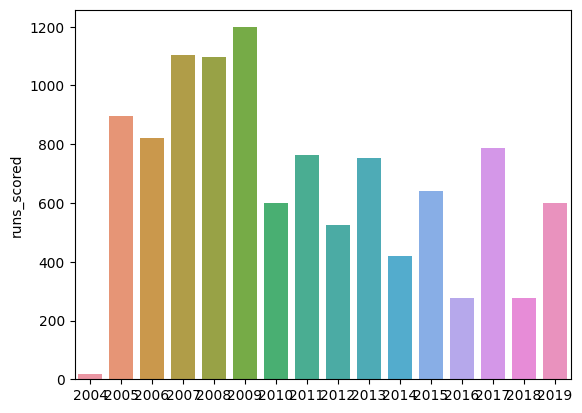

In [54]:
sn.barplot(x=x,y=runs_per_year)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 349
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   score        297 non-null    object        
 1   runs_scored  297 non-null    int32         
 2   balls_faced  297 non-null    object        
 3   strike_rate  297 non-null    object        
 4   fours        297 non-null    int32         
 5   sixes        297 non-null    int32         
 6   opposition   297 non-null    object        
 7   ground       297 non-null    object        
 8   date         297 non-null    datetime64[ns]
 9   year         297 non-null    int32         
 10  not_out      297 non-null    int32         
dtypes: datetime64[ns](1), int32(5), object(5)
memory usage: 22.0+ KB


In [ ]:
df1["balls_faced"] = df1["balls_faced"].astype(int)
df1["strike_rate"] = df1["strike_rate"].astype(float)


In [55]:
px.bar(x=x,y=runs_per_year)

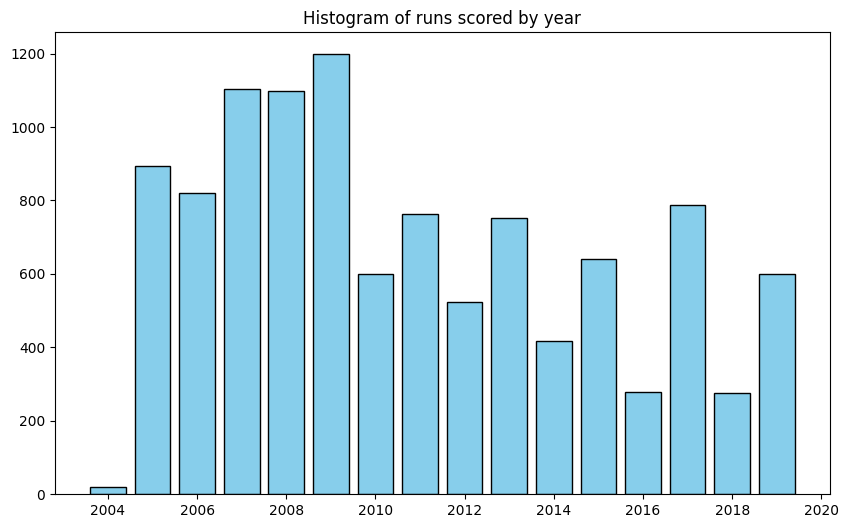

In [57]:
import matplotlib.pyplot as plt
df_grouped = df1.groupby('year')['runs_scored'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.bar(df_grouped['year'],df_grouped['runs_scored'],color = 'skyblue',edgecolor='black')
plt.title('Histogram of runs scored by year')
plt.show()

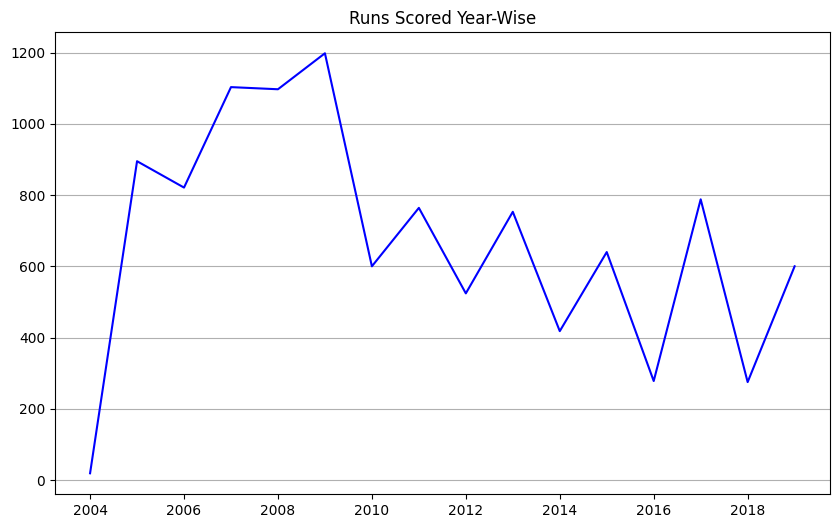

In [66]:
plt.figure(figsize=(10,6))
plt.plot(df_grouped['year'],df_grouped['runs_scored'],linestyle="-",color='b')
plt.title('Runs Scored Year-Wise')
plt.grid(axis='y')
plt.show()

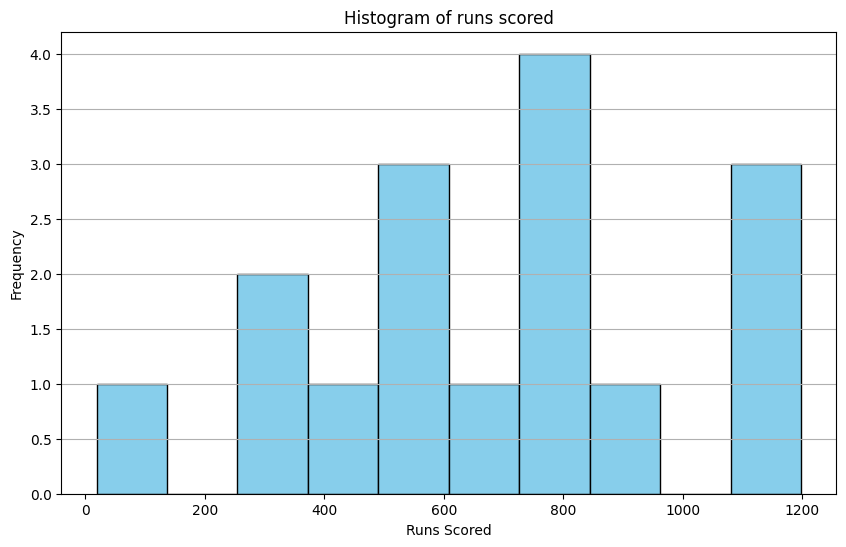

In [65]:
plt.figure(figsize=(10,6))
plt.hist(df_grouped['runs_scored'],bins=10,color = 'skyblue',edgecolor='black')
plt.title('Histogram of runs scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [24]:
first_match_date = df1['date'].dt.date.min().strftime('%B %d, %Y')
first_match_date
print('First match: ',first_match_date)
last_match_date = df1['date'].dt.date.max().strftime('%B %d, %Y')
last_match_date
print('Last match: ',last_match_date)

First match:  December 23, 2004
Last match:  July 09, 2019


In [25]:
number_of_matches = df.shape[0]
print(f'number of matches played: {number_of_matches}')

number of matches played: 350


In [26]:
number_of_inns = df1.shape[0]
print(f'Number of innings: {number_of_inns}')

Number of innings: 297


In [27]:
not_outs = df1['not_out'].sum()
print('Not outs: ',not_outs)

Not outs:  84


In [28]:
total_runs =df1['runs_scored'].sum()
print("total runs scored: ",total_runs)

total runs scored:  10773


In [29]:
highest_runs =df1['runs_scored'].max()
print("highest run scored: ",highest_runs)

highest run scored:  183


In [30]:
career_avg = (total_runs / (number_of_inns - not_outs))
print('Career avergae: {:.4f}'.format(career_avg))

Career avergae: 50.5775


In [31]:
balls_faced = df1['balls_faced'].sum()
print(f"Total balls faced in career: ",balls_faced)

Total balls faced in career:  12303


In [32]:
career_sr = (total_runs / balls_faced) * 100 
print('Career strike rate: {:.2f}'.format(career_sr))

Career strike rate: 87.56


In [33]:
hundreds = df1.loc[(df1['runs_scored']>= 100)].shape[0]
fifties = df1.loc[(df1['runs_scored']>=50) & (df1['runs_scored']<100)].shape[0]
print(f"Number of 50's:  {fifties} \nNumber of 100's: {hundreds}")

Number of 50's:  73 
Number of 100's: 10


In [34]:
import matplotlib.pyplot as plt

              runs_scored
opposition               
Afghanistan            36
Africa XI             174
Australia            1660
Bangladesh            569
Bermuda                29
England              1546
Hong Kong             109
Ireland                34
Netherlands            19
New Zealand           940
Pakistan             1231
South Africa          830
Sri Lanka            2383
West Indies          1005
Zimbabwe              208


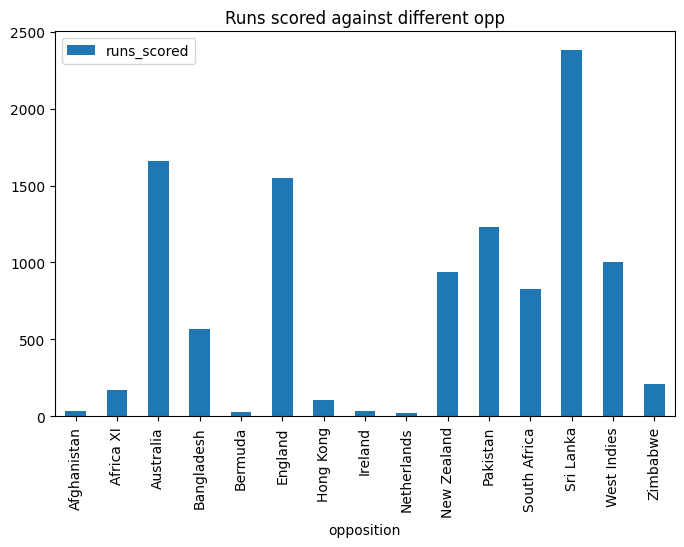

In [39]:
runs_scored_by_opposition = pd.DataFrame(df1.groupby('opposition')['runs_scored'].sum())
print(runs_scored_by_opposition)
runs_scored_by_opposition.plot(kind = 'bar', title = 'Runs scored against different opp',figsize=(8,5))
plt.show()

              runs_scored
opposition               
Afghanistan            36
Africa XI             174
Australia            1660
Bangladesh            569
Bermuda                29
England              1546
Hong Kong             109
Ireland                34
Netherlands            19
New Zealand           940
Pakistan             1231
South Africa          830
Sri Lanka            2383
West Indies          1005
Zimbabwe              208


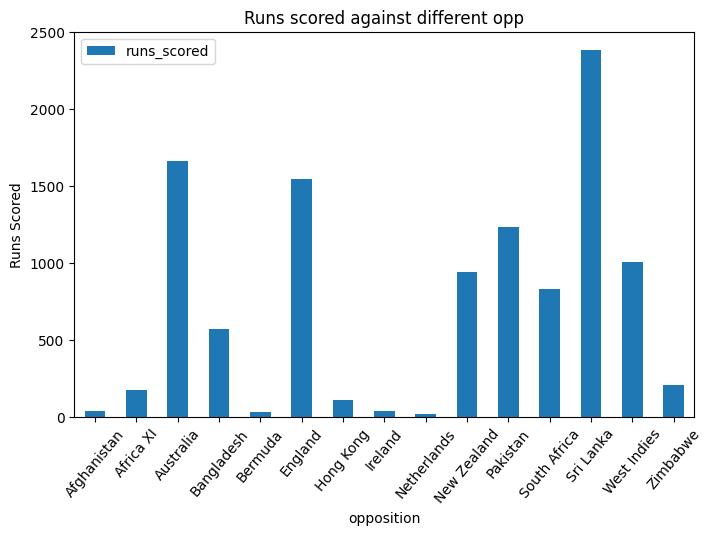

In [40]:
runs_scored_by_opposition = pd.DataFrame(df1.groupby('opposition')['runs_scored'].sum())
print(runs_scored_by_opposition)
runs_scored_by_opposition.plot(kind = 'bar', title = 'Runs scored against different opp',figsize=(8,5))
plt.xlabel('opposition')
plt.ylabel('Runs Scored')
plt.xticks(rotation = 50)
plt.legend()
plt.show()

              runs_scored
opposition               
Afghanistan            36
Africa XI             174
Australia            1660
Bangladesh            569
Bermuda                29
England              1546
Hong Kong             109
Ireland                34
Netherlands            19
New Zealand           940
Pakistan             1231
South Africa          830
Sri Lanka            2383
West Indies          1005
Zimbabwe              208


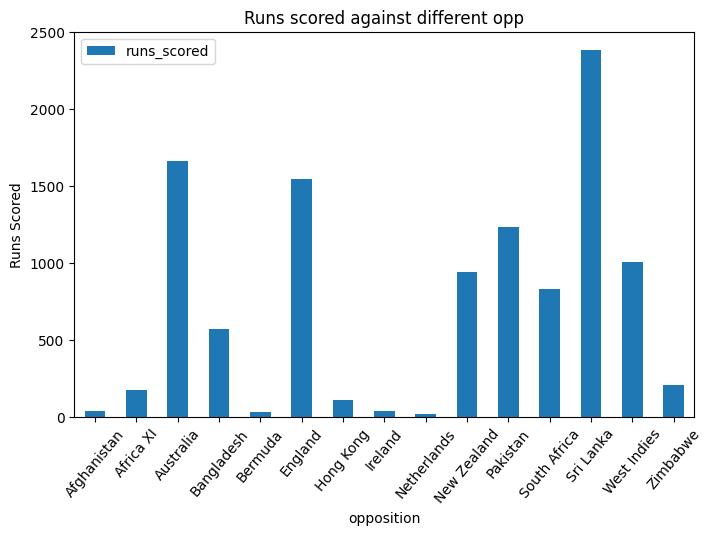

In [43]:
runs_scored_by_opposition = pd.DataFrame(df1.groupby('opposition')['runs_scored'].sum())
print(runs_scored_by_opposition)
runs_scored_by_opposition.plot(kind = 'bar', title = 'Runs scored against different opp',figsize=(8,5))
plt.xlabel('opposition')
plt.ylabel('Runs Scored')
plt.xticks(rotation = 50)
plt.legend()
plt.show()

              runs_scored
opposition               
Sri Lanka            2383
Australia            1660
England              1546
Pakistan             1231
West Indies          1005
New Zealand           940
South Africa          830
Bangladesh            569
Zimbabwe              208
Africa XI             174
Hong Kong             109
Afghanistan            36
Ireland                34
Bermuda                29
Netherlands            19


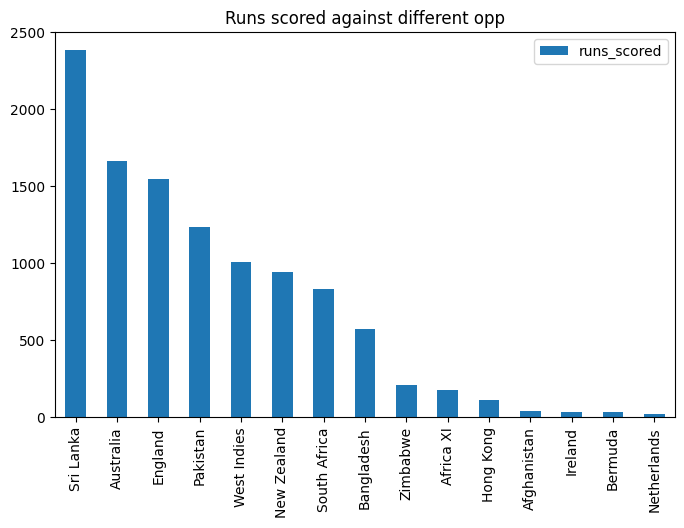

In [45]:
sorted = runs_scored_by_opposition.sort_values(by='runs_scored',ascending=False)
print(sorted)
sorted.plot(kind='bar',title="Runs scored against different opp",figsize=(8,5))
plt.xlabel(None)
plt.show()